<a href="https://colab.research.google.com/github/hngphanminh147/cv/blob/master/histogram_equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

(1200, 960)


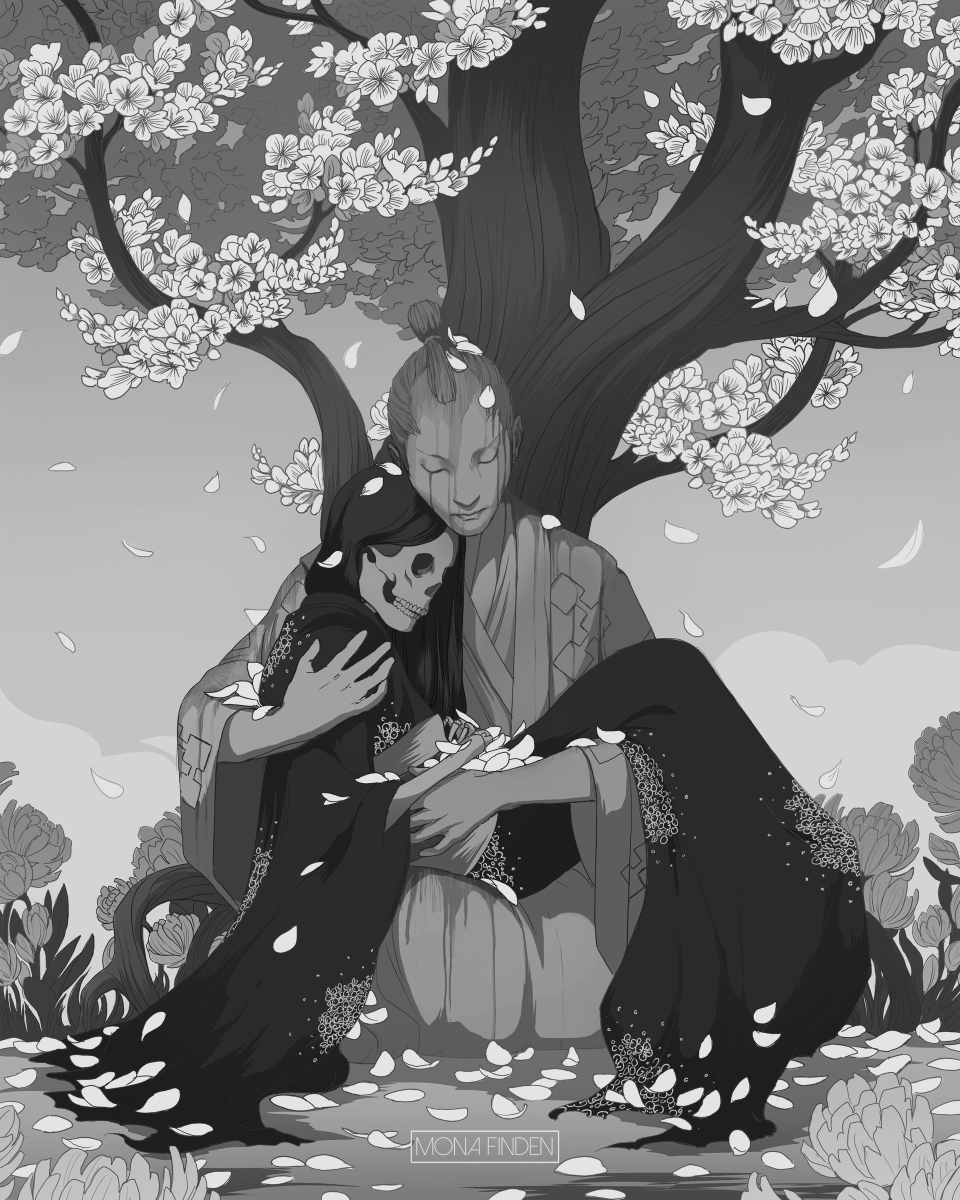

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/mona-finden-lovestory.jpg"
scale = 0.5
img = cv2.imread(path)
img = cv2.cvtColor(img, code=cv2.COLOR_BGR2GRAY)
# img = cv2.imread(path, flags=cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, dsize=((int)(img.shape[1] * scale),(int)(img.shape[0] * scale)))

print(img.shape)
cv2_imshow(img)

In [ ]:
def gray_level(img):
    re = np.zeros(shape=256,dtype=np.uint16)
    h, w = img.shape
    
    for i in range(h):
        for j in range(w):
            re[img[i, j]] += 1
    return re

# cumulative distribution
def cdf(a):
    return np.sum(a)

def hist_equalize(img):
    gray_lv = gray_level(img)
    he = np.zeros(gray_lv.shape, dtype=gray_lv.dtype)
    # ie = np.zeros(img.shape, dtype=img.dtype)

    h, w = img.shape
    max = img.max()
    min = img.min()
    l = 256

    print(cdf(gray_lv[:min + 1]))
    p = gray_lv / (h * w)

    for i in range(min, max - 1):
        pos = int(np.round((l - 1 - 1) * (cdf(gray_lv[:i + 1]) - cdf(gray_lv[:min + 1])) / ((h * w) - cdf(gray_lv[:min + 1]))))
        he[pos] = gray_lv[i]
        ie[img == i] = pos

    return he, ie

10 235
1


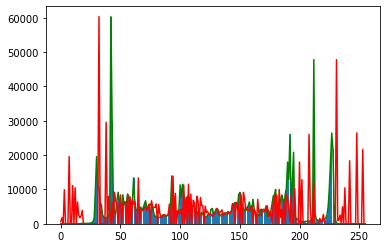

In [ ]:
gray_lv = gray_level(img)
print(img.min(), img.max())

plt.hist(img.ravel(), bins=256)
plt.plot(range(256), gray_level(img), color="green")
plt.plot(range(256), hist_equalize(img)[0], color="red")

1


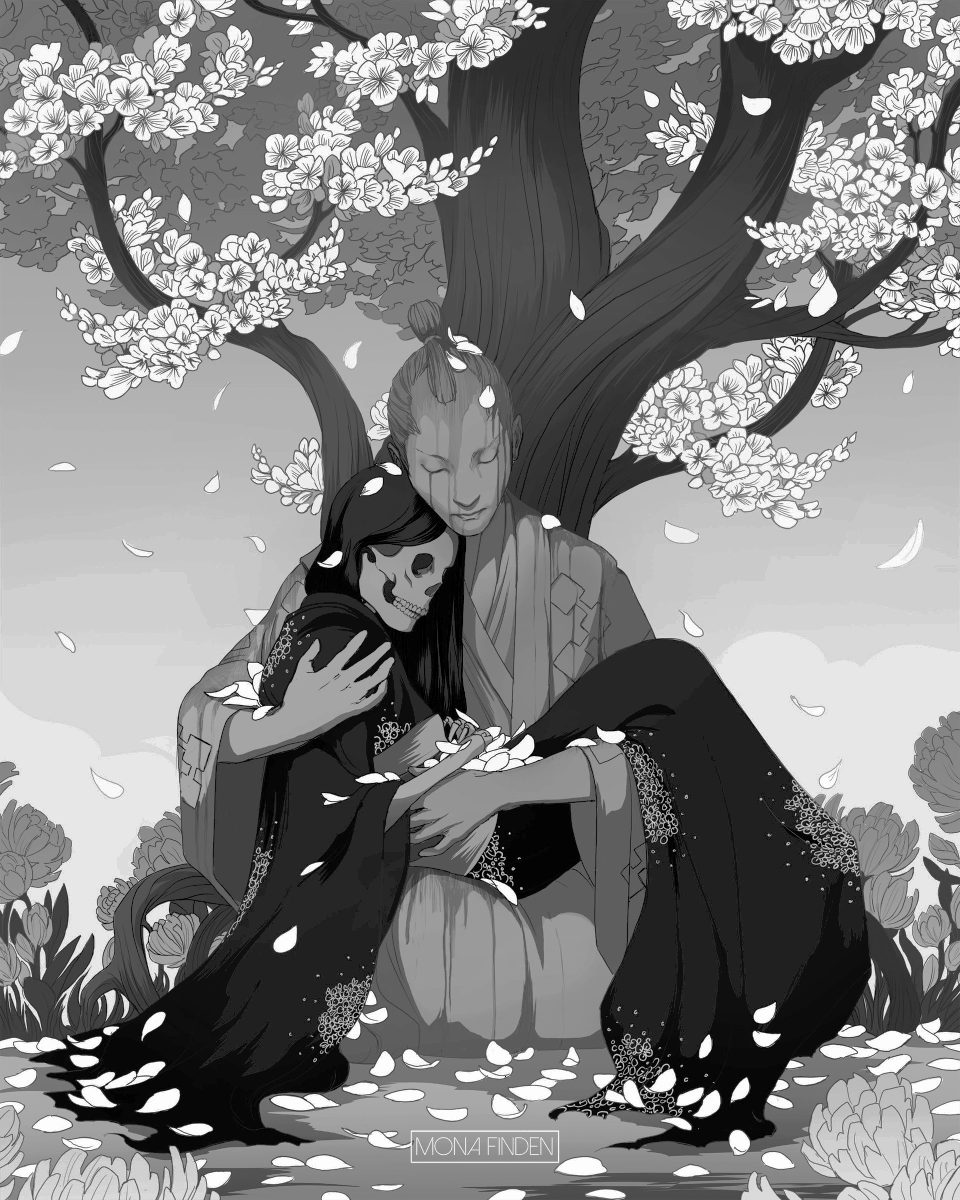

In [ ]:
he, ie = hist_equalize(img)
cv2_imshow(ie)

ref: [Histogram equalization - Wikipedia](https://en.wikipedia.org/wiki/Histogram_equalization)
